# Retrain with same number of articles in each window

In [39]:
from NaiveBayes import NaiveBayes
import json
import numpy
import datetime
import random
import matplotlib.pyplot as plt
from dateutil import relativedelta
import numpy as np

In [20]:
def use_nb_indiv(datas_train, datas_valid, reTrain = 0):
    # reTrain = 0: no retrain
    #           1: use true to retrain
    #           2: use predict to retrain
    # The Naive Bayes Model
    nb = NaiveBayes()
    # Record all of the predictions
    predicts_all = []
    # Number of all of the correctly predicted articles
    correct_all = 0
    # Correctly predicted ratio in each part
    correct_ratios = []
    # First and only train if reTrain == 0
    if reTrain == 0:
        nb.train(datas_train)
    for cur_part in range(1,partition+1):
        # If no retrain
        if reTrain in [1, 2]:
            nb.train(datas_train)
        # All of the predictions in this part
        predicts = [nb.predict(data['content'])[0] for data in datas_valid]
        # Append to all of the predictions
        predicts_all += predicts
        # Number of correctly predicted articles in this part
        correct = 0
        for i in range(len(predicts)):
            if predicts[i] == datas_valid[i]['category']:
                correct += 1
        # Add to all of the correctly predicted articles
        correct_all += correct
        # Add to all of the ratios
        correct_ratios.append(correct/len(datas_valid))
        print("Correct: ", correct, "out of ", len(datas_valid))
        print(datas_valid[-1]['date'])
        # get next train, valid pair
        datas_train = datas[min(len(datas), plen*cur_part) : min(len(datas), plen*(cur_part+1))]
        datas_valid = datas[min(len(datas), plen*(cur_part+1)) : min(len(datas), plen*(cur_part+2))]
        # Update data_train only if use predict to retrain
        if reTrain == 2:
            for i in range(len(datas_train)):
                datas_train[i]['category'] = predicts[i]
    #
    res = "Correct: %d out of %d"%(correct_all, len(predicts_all))
    print(res)
    return correct_ratios
    #return res 

## retrain performance with random order

In [41]:
%%capture
with open('../datas/bbc_preprocessed.json') as f:
    datas = json.load(f)
    
datas = datas[1611:]

random.seed(5566)
random.shuffle(datas)

partition = 100
plen = len(datas)//partition
d1 = datas[:plen]
d2 = datas[plen:plen*2]
np
# use true to retrain
res2 = use_nb_indiv(d1, d2, reTrain = 1)[:-1]
# use predict to retrain
res3 = use_nb_indiv(d1, d2, reTrain = 2)[:-1]

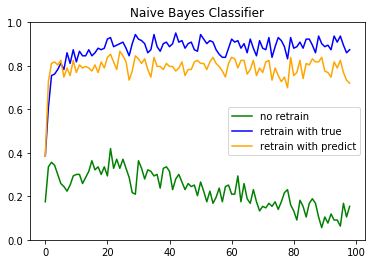

In [42]:
no_retrain_line,           = plt.plot(list(range(len(res1))), res1, label = 'no retrain', color = 'green')
retrain_with_true_line,    = plt.plot(list(range(len(res2))), res2, label = 'retrain with true', color = 'blue')
retrain_with_predict_line, = plt.plot(list(range(len(res2))), res3, label = 'retrain with predict', color = 'orange')
plt.legend(handles = [no_retrain_line, retrain_with_true_line, retrain_with_predict_line])
axes = plt.gca()
axes.set_ylim([0, 1])
plt.title("Naive Bayes Classifier")
plt.show()

In [43]:
[np.mean(res1), np.mean(res2), np.mean(res3)]

[0.2321819594546867, 0.87730451366815021, 0.79056297238115436]

## retrain performance with timeseries order

In [44]:
%%capture
with open('../datas/bbc_preprocessed.json') as f:
    datas = json.load(f)
    
datas = datas[1600:]

partition = 100
plen = len(datas)//partition
d1 = datas[:plen]
d2 = datas[plen:plen*2]

# no retrain
res1 = use_nb_indiv(d1, d2, reTrain = 0)[:-1]
# use true to retrain
res2 = use_nb_indiv(d1, d2, reTrain = 1)[:-1]
# use predict to retrain
res3 = use_nb_indiv(d1, d2, reTrain = 2)[:-1]


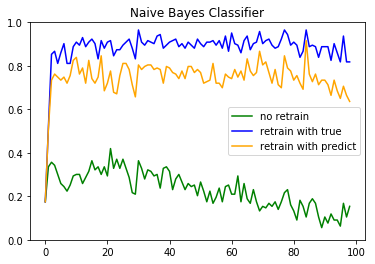

In [45]:
no_retrain_line,           = plt.plot(list(range(len(res1))), res1, label = 'no retrain', color = 'green')
retrain_with_true_line,    = plt.plot(list(range(len(res2))), res2, label = 'retrain with true', color = 'blue')
retrain_with_predict_line, = plt.plot(list(range(len(res2))), res3, label = 'retrain with predict', color = 'orange')
plt.legend(handles = [no_retrain_line, retrain_with_true_line, retrain_with_predict_line])
axes = plt.gca()
axes.set_ylim([0, 1])
plt.title("Naive Bayes Classifier")
plt.show()

In [46]:
[np.mean(res1), np.mean(res2), np.mean(res3)]

[0.2321819594546867, 0.88295542840997354, 0.74733347460620203]

# Retrain with same time interval in each window

In [5]:
import json
with open('../datas/bbc_classifyTimeSeries.json') as f:
    datasss = json.load(f)

In [6]:
def to_datetime(date):
    return datetime.datetime.strptime(date , '%d %B %Y')

for datass in datasss:
    date  = datass['date']
    datas = datass['datas']
    
    datass['date'] = to_datetime(date)
    for data in datas:
        data['date'] = to_datetime(data['date'])


## time interval: 40 days

In [7]:
init_date = datasss[0]['date']
datasss_30_day = []
interval = 60
datediff = relativedelta.relativedelta(days = interval)

cur_date = init_date
for datass in datasss:
    date = datass['date']
    datas = datass['datas']
    if date < cur_date:
        datasss_30_day[-1] += (datas)
    else:
        datasss_30_day.append(datas)
        cur_date = cur_date + datediff

### Number of articles in each intervals

In [8]:
datasss_30_day_cnt = [len(datass) for datass in datasss_30_day]

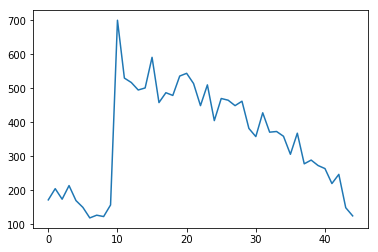

In [9]:
plt.plot(list(range(len(datasss_30_day_cnt))), datasss_30_day_cnt)
plt.show()

In [16]:
datasss_30_day_cnt = [len(datass) for datass in datasss_30_day][10:]

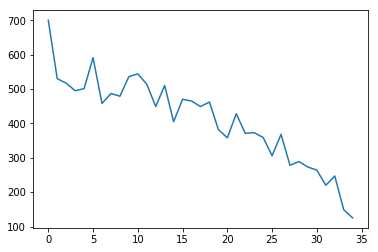

In [17]:
plt.plot(list(range(len(datasss_30_day_cnt))), datasss_30_day_cnt)
plt.show()

In [18]:
sum([len(datass) for datass in datasss_30_day][:10])

1611

In [31]:
def use_nb_indiv2(datasss_x, reTrain = 0):
    # reTrain = 0: no retrain
    #           1: use true to retrain
    #           2: use predict to retrain
    # The Naive Bayes Model
    # The Naive Bayes Model
    nb = NaiveBayes()
    # Record all of the predictions
    predicts_all = []
    # Number of all of the correctly predicted articles
    correct_all = 0
    # Correctly predicted ratio in each part
    correct_ratios = []
    # First train, if reTrain = 0, only train
    j = 0
    datas_train = datasss_x[j]
    datas_valid = datasss_x[j+1]
    nb.train(datas_train)

    for j in range(1, len(datasss_x)-1):
        if reTrain in [1, 2]:
            nb.train(datas_train)

        # All of the predictions in this part
        predicts = [nb.predict(data['content'])[0] for data in datas_valid]
        # Append to all of the predictions
        predicts_all += predicts
        # Number of correctly predicted articles in this part
        correct = 0
        for i in range(len(predicts)):
            if predicts[i] == datas_valid[i]['category']:
                correct += 1
        # Add to all of the correctly predicted articles
        correct_all += correct
        # Add to all of the ratios
        correct_ratios.append(correct/len(datas_valid))
        print("Correct: ", correct, "out of ", len(datas_valid))
        print(datas_valid[-1]['date'])
        #
        datas_train = datasss_x[j]
        datas_valid = datasss_x[j+1]
        if reTrain == 2:
            for i in range(len(datas_train)):
                datas_train[i]['category'] = predicts[i]
    #
    res = "Correct: %d out of %d"%(correct_all, len(predicts_all))
    print(res)
    return correct_ratios
    #return res 


In [32]:
%%capture

# no retrain
res1 = use_nb_indiv2(datasss_30_day, reTrain = 0)
# use true to retrain
res2 = use_nb_indiv2(datasss_30_day, reTrain = 1)
# use predict to retrain
res3 = use_nb_indiv2(datasss_30_day, reTrain = 2)


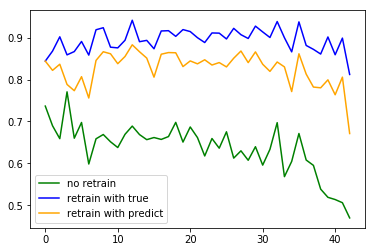

In [33]:
no_retrain_line,           = plt.plot(list(range(len(res1))), res1, label = 'no retrain', color = 'green')
retrain_with_true_line,    = plt.plot(list(range(len(res2))), res2, label = 'retrain with true', color = 'blue')
retrain_with_predict_line, = plt.plot(list(range(len(res2))), res3, label = 'retrain with predict', color = 'orange')
plt.legend(handles = [no_retrain_line, retrain_with_true_line, retrain_with_predict_line])
plt.show()

In [34]:
sum([len(datas) for datas in datasss_30_day][:10])

1611